In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
G = nx.read_edgelist('../data/Cit-HepPh.txt', create_using=nx.DiGraph)

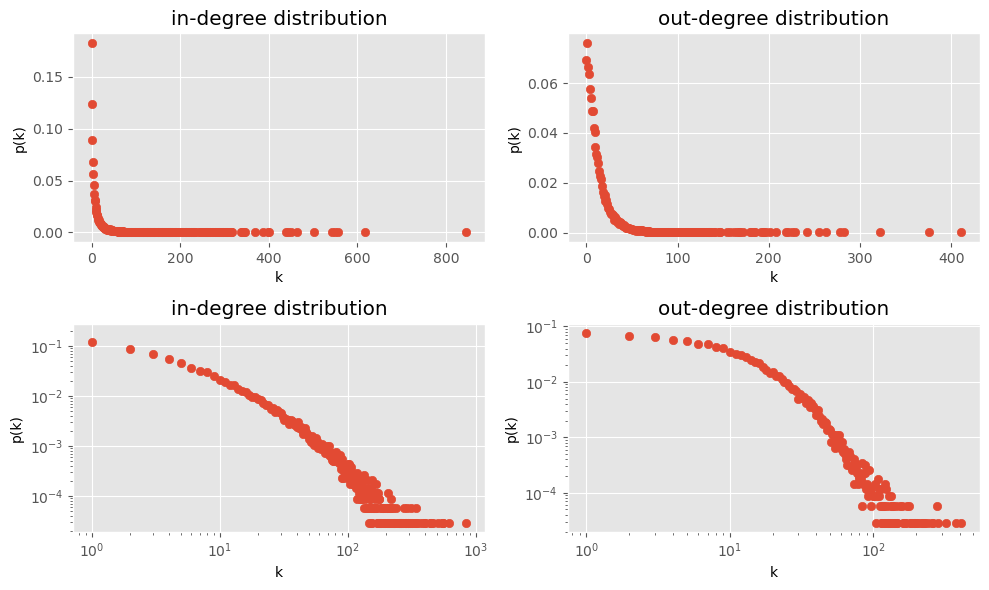

In [39]:
in_degrees = np.array(list(dict(G.in_degree).values()))
out_degrees = np.array(list(dict(G.out_degree).values()))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,6))

# plot in-degree
d_in, v_in = np.unique(in_degrees, return_counts=True)
v_in = v_in / v_in.sum()
ax1.scatter(d_in, v_in)
ax1.set_xlabel('k')
ax1.set_ylabel('p(k)')
ax1.set_title('in-degree distribution')

# plot in-degree log-log
d_in, v_in = np.unique(in_degrees, return_counts=True)
v_in = v_in / v_in.sum()
ax3.scatter(d_in, v_in)
ax3.set_xlabel('k')
ax3.set_ylabel('p(k)')
ax3.set_title('in-degree distribution')
ax3.set_xscale('log')
ax3.set_yscale('log')

# plot out-degree
d_out, v_out = np.unique(out_degrees, return_counts=True)
v_out = v_out / v_out.sum()
ax2.scatter(d_out, v_out)
ax2.set_xlabel('k')
ax2.set_ylabel('p(k)')
ax2.set_title('out-degree distribution')

# plot out-degree log-log
d_out, v_out = np.unique(out_degrees, return_counts=True)
v_out = v_out / v_out.sum()
ax4.scatter(d_out, v_out)
ax4.set_xlabel('k')
ax4.set_ylabel('p(k)')
ax4.set_title('out-degree distribution')
ax4.set_xscale('log')
ax4.set_yscale('log')

plt.tight_layout()

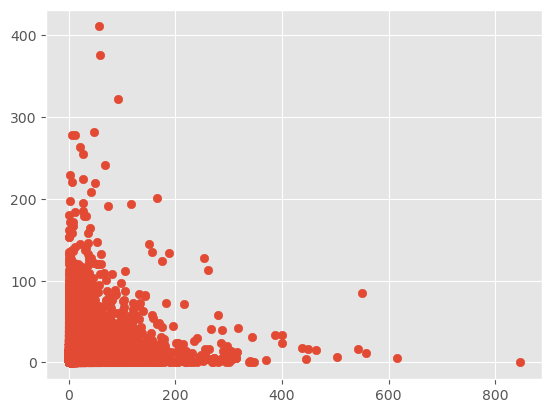

In [43]:
fig, ax = plt.subplots()
ax.scatter(in_degrees, out_degrees)

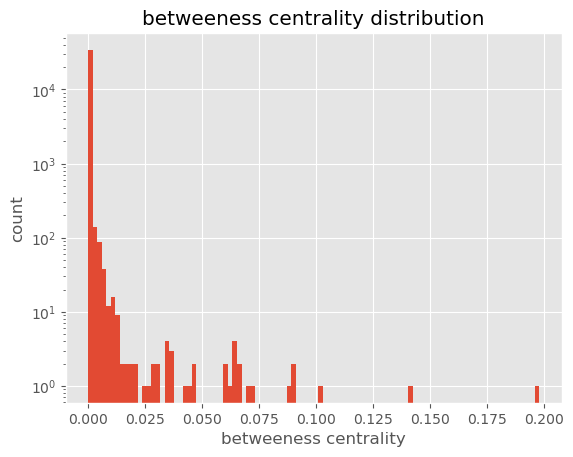

In [5]:
fig, ax = plt.subplots()
betweeness = nx.betweenness_centrality(G, k=100)
ax.hist(betweeness.values(), bins=100)
ax.set_title('betweeness centrality distribution')
ax.set_xlabel('betweeness centrality')
ax.set_ylabel('count')
ax.set_yscale('log')

Text(0, 0.5, 'count')

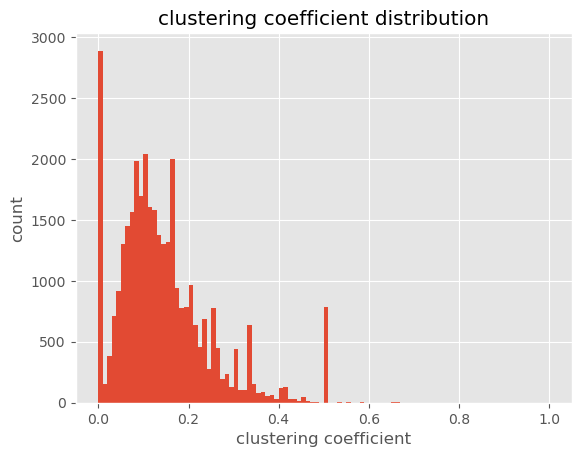

In [6]:
clustering = nx.clustering(G)
fig, ax = plt.subplots()
ax.hist(clustering.values(), bins=100)
ax.set_title('clustering coefficient distribution')
ax.set_xlabel('clustering coefficient')
ax.set_ylabel('count')

### compare with random configuration model

In [7]:
G_random = nx.directed_configuration_model(in_degrees, out_degrees, create_using=nx.DiGraph)

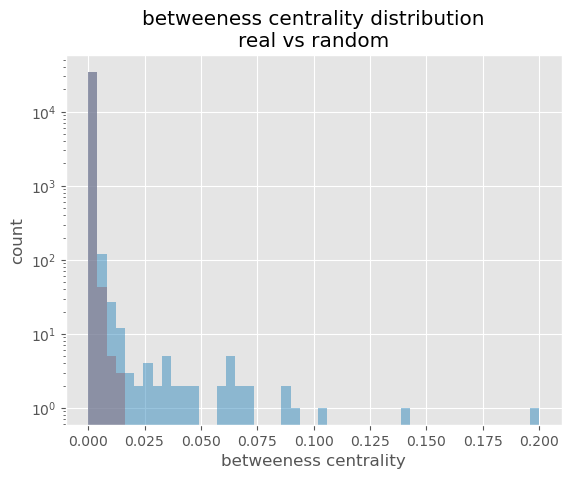

In [8]:
betweeness_random = nx.betweenness_centrality(G_random, k=100)
fig, ax = plt.subplots()
bins = np.linspace(0, 0.2, 50)
ax.hist(betweeness_random.values(), bins=bins, alpha=0.5, label='random')
ax.hist(betweeness.values(), bins=bins, alpha=0.5, label='real')
ax.set_title('betweeness centrality distribution\nreal vs random')
ax.set_xlabel('betweeness centrality')
ax.set_ylabel('count')
ax.set_yscale('log')